## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_l1_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    model = build_mlp_l1_l2(input_shape=x_train.shape[1:], l_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0830 14:00:05.401536  8908 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0830 14:00:05.402536  8908 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0830 14:00:05.416536  8908 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 14:00:05.417536  8908 deprecation_wrapper.py:119] From D:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 14:00:05.41953

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0830 14:00:05.768536  8908 deprecation.py:323] From D:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 188us/step - loss: 198.6985 - acc: 0.2340 - val_loss: 41.1361 - val_acc: 0.2461
Epoch 2/50
50000/50000 [==============================] - 7s 130us/step - loss: 19.1187 - acc: 0.1184 - val_loss: 7.2732 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 4.0969 - acc: 0.0977 - val_loss: 2.6419 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.4855 - acc: 0.0996 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.4626 - acc: 0.0989 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.4626 - acc: 0.0986 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.462

Epoch 2/50
50000/50000 [==============================] - 8s 159us/step - loss: 15.9140 - acc: 0.1082 - val_loss: 5.1413 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 3.2192 - acc: 0.0982 - val_loss: 2.4721 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.4633 - acc: 0.0973 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.4624 - acc: 0.0977 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.4624 - acc: 0.0972 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.4623 - acc: 0.0979 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.4623 - acc: 0.0975 - val_loss: 2.4623 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=========

50000/50000 [==============================] - 6s 121us/step - loss: 5.5646 - acc: 0.3987 - val_loss: 5.5021 - val_acc: 0.4140
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 5.4445 - acc: 0.4202 - val_loss: 5.3947 - val_acc: 0.4257
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 5.3378 - acc: 0.4358 - val_loss: 5.3006 - val_acc: 0.4350
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 5.2373 - acc: 0.4472 - val_loss: 5.2114 - val_acc: 0.4434
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 5.1425 - acc: 0.4604 - val_loss: 5.1181 - val_acc: 0.4537
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 5.0539 - acc: 0.4688 - val_loss: 5.0292 - val_acc: 0.4629
Epoch 9/50
50000/50000 [==============================] - 6s 128us/step - loss: 4.9658 - acc: 0.4773 - val_loss: 4.9623 - val_acc: 0.4657
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 159us/step - loss: 12.0864 - acc: 0.4019 - val_loss: 11.2476 - val_acc: 0.4070
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 10.5182 - acc: 0.4094 - val_loss: 9.8108 - val_acc: 0.4129
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 9.1836 - acc: 0.4167 - val_loss: 8.5808 - val_acc: 0.4173
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 8.0469 - acc: 0.4209 - val_loss: 7.5292 - val_acc: 0.4237
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 7.0781 - acc: 0.4270 - val_loss: 6.6440 - val_acc: 0.4277
Epoch 9/50
50000/50000 [==============================] - 8s 156us/step - loss: 6.2548 - acc: 0.4306 - val_loss: 5.8866 - val_acc: 0.4290
Epoch 10/50
50000/50000 [==============================] - 8s 153us/step - loss: 5.5528 - acc: 0.4336 - val_loss: 5.2365 - val_acc: 0.4399
Epoch 11/50
50000/50000 [================

50000/50000 [==============================] - 6s 128us/step - loss: 1.6246 - acc: 0.4299 - val_loss: 1.6164 - val_acc: 0.4290
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5838 - acc: 0.4444 - val_loss: 1.5858 - val_acc: 0.4437
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5482 - acc: 0.4567 - val_loss: 1.5477 - val_acc: 0.4559
Epoch 8/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5171 - acc: 0.4664 - val_loss: 1.5245 - val_acc: 0.4596
Epoch 9/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4904 - acc: 0.4756 - val_loss: 1.5057 - val_acc: 0.4695
Epoch 10/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4656 - acc: 0.4842 - val_loss: 1.5006 - val_acc: 0.4626
Epoch 11/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4420 - acc: 0.4928 - val_loss: 1.4784 - val_acc: 0.4734
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 7s 146us/step - loss: 7.7245 - acc: 0.4118 - val_loss: 7.2649 - val_acc: 0.4177
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 6.8507 - acc: 0.4209 - val_loss: 6.4578 - val_acc: 0.4197
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 6.1041 - acc: 0.4248 - val_loss: 5.7703 - val_acc: 0.4241
Epoch 9/50
50000/50000 [==============================] - 7s 147us/step - loss: 5.4675 - acc: 0.4302 - val_loss: 5.1835 - val_acc: 0.4325
Epoch 10/50
50000/50000 [==============================] - 7s 147us/step - loss: 4.9242 - acc: 0.4357 - val_loss: 4.6897 - val_acc: 0.4303
Epoch 11/50
50000/50000 [==============================] - 8s 152us/step - loss: 4.4599 - acc: 0.4391 - val_loss: 4.2601 - val_acc: 0.4373
Epoch 12/50
50000/50000 [==============================] - 8s 155us/step - loss: 4.0616 - acc: 0.4432 - val_loss: 3.8958 - val_acc: 0.4388
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 6s 120us/step - loss: 1.5515 - acc: 0.4537 - val_loss: 1.5544 - val_acc: 0.4504
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5208 - acc: 0.4634 - val_loss: 1.5290 - val_acc: 0.4620
Epoch 9/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.4915 - acc: 0.4737 - val_loss: 1.5138 - val_acc: 0.4625
Epoch 10/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4698 - acc: 0.4807 - val_loss: 1.5015 - val_acc: 0.4694
Epoch 11/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4437 - acc: 0.4899 - val_loss: 1.4790 - val_acc: 0.4801
Epoch 12/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4218 - acc: 0.4977 - val_loss: 1.4589 - val_acc: 0.4818
Epoch 13/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4013 - acc: 0.5058 - val_loss: 1.4469 - val_acc: 0.4888
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 10s 193us/step - loss: 6.0861 - acc: 0.4287 - val_loss: 5.7661 - val_acc: 0.4213
Epoch 9/50
50000/50000 [==============================] - 9s 173us/step - loss: 5.4513 - acc: 0.4339 - val_loss: 5.1703 - val_acc: 0.4325
Epoch 10/50
50000/50000 [==============================] - 7s 150us/step - loss: 4.9096 - acc: 0.4388 - val_loss: 4.6689 - val_acc: 0.4361
Epoch 11/50
50000/50000 [==============================] - 7s 145us/step - loss: 4.4456 - acc: 0.4439 - val_loss: 4.2517 - val_acc: 0.4411
Epoch 12/50
50000/50000 [==============================] - 7s 145us/step - loss: 4.0486 - acc: 0.4468 - val_loss: 3.8788 - val_acc: 0.4429
Epoch 13/50
50000/50000 [==============================] - 7s 146us/step - loss: 3.7086 - acc: 0.4526 - val_loss: 3.5638 - val_acc: 0.4519
Epoch 14/50
50000/50000 [==============================] - 7s 150us/step - loss: 3.4171 - acc: 0.4551 - val_loss: 3.2990 - val_acc: 0.4471
Epoch 15/50
50000/50000 [==============

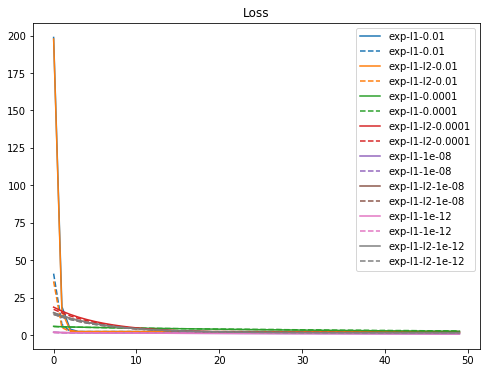

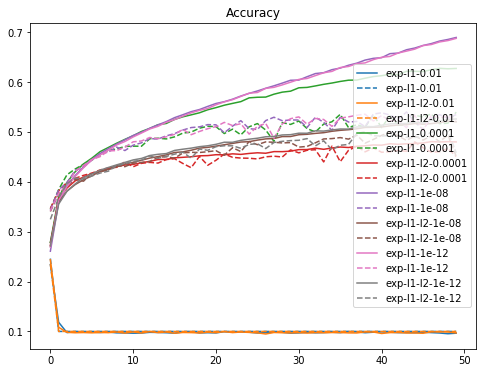

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()